# Nonstationary RBF

This is a very simple kernel that just allows us to select the lengthscale as a function of X.

There are issues. Most importantly you can't optimise anything with this kernel - it was developed for my differential privacy work where standard optimize functions aren't permitted.

In [1]:
from nonstationary_rbf import NonstationaryRBF
import numpy as np
import GPy

## 1d Example

 /home/mike/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


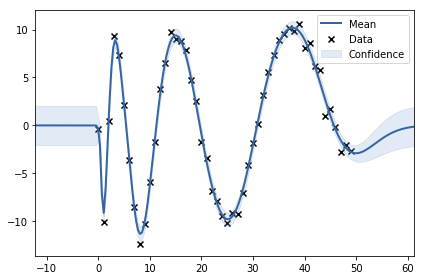

In [4]:
def lengthscalefun(X,dim):
    temp = X[0]
    if temp<0.1:
        temp = 0.1
    return 1/(1.91*temp**-0.6)
    
k = NonstationaryRBF(1,lengthscalefun=lengthscalefun)
#k = GPy.kern.RBF(1)
#k.lengthscale=5
X = np.arange(0,50,1)[:,None]
Y = 10*np.sin((50*X[:,0:1])**0.4)+1*np.random.randn(X.shape[0],1)
#X = X[::-1] #uncomment this to see effect when the lengthscale doesn't agree!
m = GPy.models.GPRegression(X,Y,k)
m.Gaussian_noise = 0.1
import matplotlib.pyplot as plt
%matplotlib inline
m.plot()

## 2d example (same function)

 /home/mike/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


 /home/mike/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


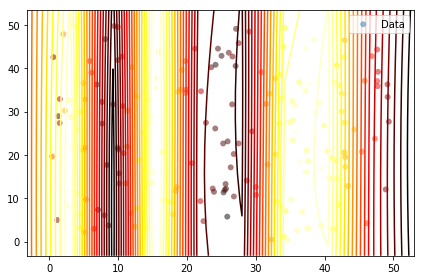

In [6]:
def lengthscalefun(X,dim):
    if dim==0:
        x = X[0]
        if x<0.1:
            x = 0.1
        return 1/(1.91*x**-0.6)
    else:
        return 100

X = np.random.rand(200,2)*50
Y = 10*np.sin((50*X[:,0:1])**0.4)+1*np.random.randn(X.shape[0],1)
k = NonstationaryRBF(2,lengthscalefun=lengthscalefun)
#k = GPy.kern.RBF(2)
k.lengthscale=1000000
m = GPy.models.GPRegression(X,Y,k)
m.Gaussian_noise = 0.1
import matplotlib.pyplot as plt
%matplotlib inline
m.plot(resolution=10)

## References and notes

From (Gibbs, 1998, see pages 24 and 54), this is for EQ kernels,
<img src="spatially.png" width=76% />


Mark N Gibbs. Bayesian Gaussian processes for regression and classification. PhD thesis. 1998.